In [32]:
def function1(input1):
    return input1+ " from first function"

In [33]:
def function2(input2):
        return input2 + " Savita from second function"

In [34]:
def function3(input3):
    pass

In [35]:
function1("sunny")

'sunny from first function'

In [36]:
function2("savita")

'savita Savita from second function'

In [37]:
from langgraph.graph import Graph

In [38]:
workflow1=Graph()

In [39]:
workflow1.add_node("fun1", function1)

In [40]:
workflow1.add_node("fun2", function2)

In [41]:
workflow1.add_edge("fun1", "fun2")

In [42]:
workflow1.set_entry_point("fun1")

In [43]:
workflow1.set_finish_point("fun2")

In [44]:
app=workflow1.compile()

In [45]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [46]:
from IPython.display import Image, display

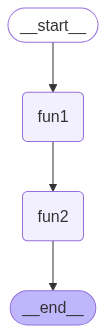

In [47]:
display(Image(app.get_graph().draw_mermaid_png()))

In [48]:
app.invoke("Hi this is Sunny")

'Hi this is Sunny from first function Savita from second function'

In [50]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from fun1
_______
hi this is rohit from first function


here is output from fun2
_______
hi this is rohit from first function Savita from second function




In [136]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GOOGLE_API_KEY']=os.getenv("GOOGLE_API_KEY")

In [138]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [ ]:
model.invoke("Hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--5ddfb876-a42c-491b-8324-957fea1b7c33-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [141]:
model.invoke("Hi").content

'Hi there! How can I help you today?'

In [145]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [146]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [147]:
workflow2=Graph()

In [148]:
workflow2.add_node("my_llm", llm)


In [149]:
workflow2.add_node("LLM_Output_Token_Counter", token_counter)

In [150]:
workflow2.add_edge("my_llm", "LLM_Output_Token_Counter")

In [151]:
print(workflow2.nodes.keys())

dict_keys(['my_llm', 'LLM_Output_Token_Counter'])


In [152]:
workflow2.set_entry_point("my_llm")

In [153]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [154]:
app=workflow2.compile()

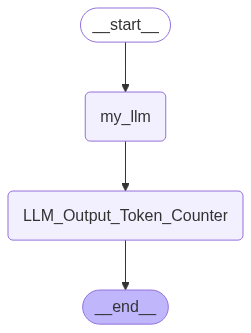

In [132]:
display(Image(app.get_graph().draw_mermaid_png()))

In [155]:
app.invoke("Can you tell me about the india's capital?")

'total token number in the generated answer is 54'

In [156]:
app.invoke("tell me about the tata enterprises in very detailed way")

'total token number in the generated answer is 747'

In [157]:
for output in app.stream("Can you tell me about the india's capital?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from my_llm
_______
India's capital is **New Delhi**.  It's important to note that while New Delhi is the capital, it's actually a part of a larger metropolitan area called Delhi.  Delhi is a union territory, meaning it's directly governed by the central government, unlike states which have their own elected governments.  New Delhi serves as the seat of the national government, housing Parliament, the President's residence, and numerous other government offices and ministries.


here is output from LLM_Output_Token_Counter
_______
total token number in the generated answer is 70




In [ ]:
p